# Nonuniform sensitivity

## Background

Not all pixels in a camera have the same sensitivity to light. There is some intrinsic difference from pixel-to-pixel but there is also vignetting (dimming near the corners) caused by the optical system to which the camera is attached, and dust on optical elements (filters, the glass window covering the CCD, the CCD chip itself) blocks some light.

The effect of each of these is to reduce the amount of light reaching the CCD chip, in the case of vvingetting and dust, and to affect the counts read from the chip (pixel-to-pixel sensitivity variations).

The code to produce the simulated sensitivty map (aka flat image) is long enough that is not included in the notebook. We load it instead from [image_sim.py](image_sim.py).

In [1]:
import numpy as np

from convenience_functions import show_image
from image_sim import *

## A sample flat image

The sample below has the same size as the simulated images in the previous images. 

In [2]:
image = np.zeros([2000, 2000])
flat = sensitivity_variations(image)

On number 1 [817, 1890] 40 0.311081623106733
On number 2 [959, 1754] 40 0.15932611231734964
On number 3 [239, 1391] 40 0.2953669892707131
On number 4 [663, 405] 40 0.2803489773729839
On number 5 [328, 1946] 100 0.3045512039225755
On number 6 [1197, 1096] 40 0.26797576001274265
On number 7 [1309, 416] 40 0.2550243520554174
On number 8 [1744, 1915] 40 0.2944267391845221
On number 9 [1313, 807] 40 0.3085538189831121
On number 10 [1802, 1229] 40 0.2639033901812314
On number 11 [467, 838] 100 0.19449110209613055
On number 12 [1101, 1196] 40 0.2326615640821592
On number 13 [946, 1554] 40 0.2885929641506658
On number 14 [1935, 1148] 40 0.28706707102510554
On number 15 [404, 1318] 40 0.30524306476628454
On number 16 [1126, 1697] 40 0.23542615332732642
On number 17 [72, 1764] 40 0.22449895359034525
On number 18 [572, 1249] 40 0.24607349139208895
On number 19 [1048, 1248] 100 0.27892399797838685
On number 20 [1399, 1156] 40 0.21878362959613898
On number 21 [704, 886] 100 0.28410977323834824
On n

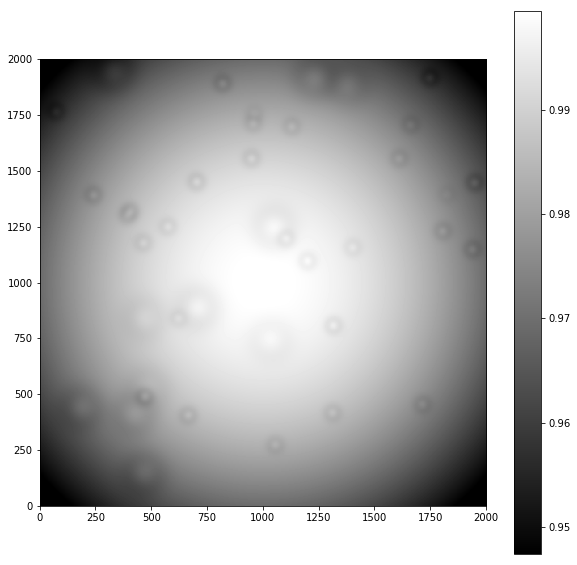

In [3]:
show_image(flat, cmap='gray')

Note that the size of the variations is small, at most a few percent. 

## Effect of nonuniform sensitivity on images

Recall that an image read off a CCD, ignoring variations in sensitivity, can be though of as a combination of several pieces:

$$
\text{image} = \text{bias} + \text{noise} + \text{dark current} + \text{sky} + \text{stars}
$$

The effect of sensitivty variations is to reduce the amount of *light* reaching the sensor. In the equation above, that means that the flat multiples just the sky and stars portion of the input,

$$
\text{image} = \text{bias} + \text{noise} + \text{dark current} + \text{flat} \times (\text{sky} + \text{stars})
$$


## A realistic image

In the cell below we construct the same image from the previous notebook. Recall that there we used a read noise of 5 electrons/pixel, dark current of 0.1 electron/pix/sec, bias level of 1100, and sky background of 20 counts.

In [5]:
gain = 1.0
exposure = 30.0
dark = 0.1
sky_counts = 20
bias_only = bias(image, 1100, realistic=True)
noise_only = read_noise(image, 5, gain=gain)
dark_only = dark_current(image, dark, exposure, gain=gain, hot_pixels=True)
sky_only = sky_background(image, sky_counts, gain=gain)
stars_only = stars(image, 50, max_counts=2000)

In [6]:
final_image = bias_only + noise_only + dark_only + flat * (sky_only + stars_only)

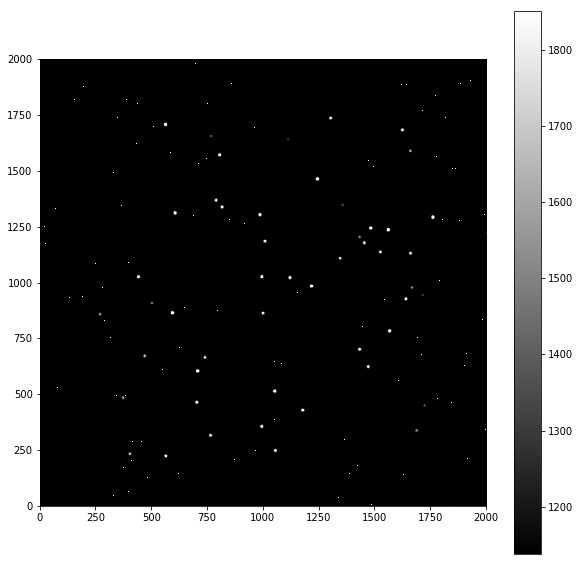

In [7]:
show_image(final_image, cmap='gray', percu=99.9)

Visually this does not look any different tha the final image in the previous notebook; the effects of sensitivity variations are typically not evident in raw images unless the sky background is large. 

You can see the effect by artificially increasing the sky background.

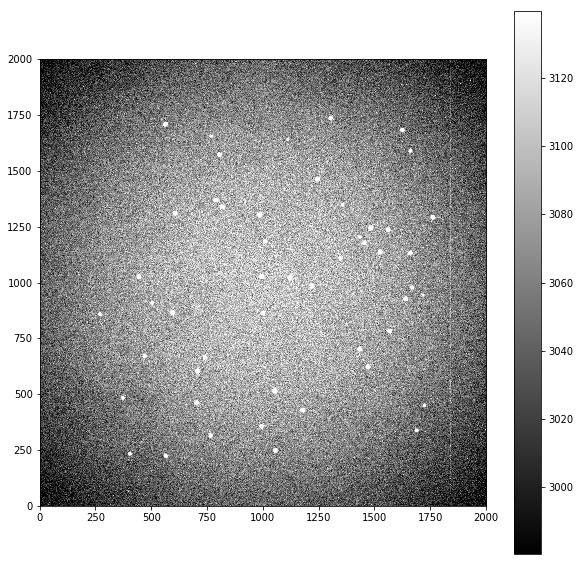

In [14]:
final_image2 = bias_only + noise_only + dark_only + flat * (sky_background(image, 100 * sky_counts, gain=gain) + stars_only)
show_image(final_image2, cmap='gray')